# Sales Performance Analysis

This notebook analyzes sales data using pandas and visualization libraries.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load dataset
df = pd.read_csv(
    r"C:\Users\admin\Documents\Desktop\New folder\data anltic project\Sample - Superstore.csv",
    encoding="latin1"
)


In [49]:
# Basic information
df.info()
df.describe(include='all')
df.isnull().mean()*100
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

np.int64(0)

In [50]:
# Data cleaning
df.drop_duplicates(inplace=True)

In [51]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)


Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate Rows: 0

Data Types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [52]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [53]:
# FEATURE ENGINEERING (TIME)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

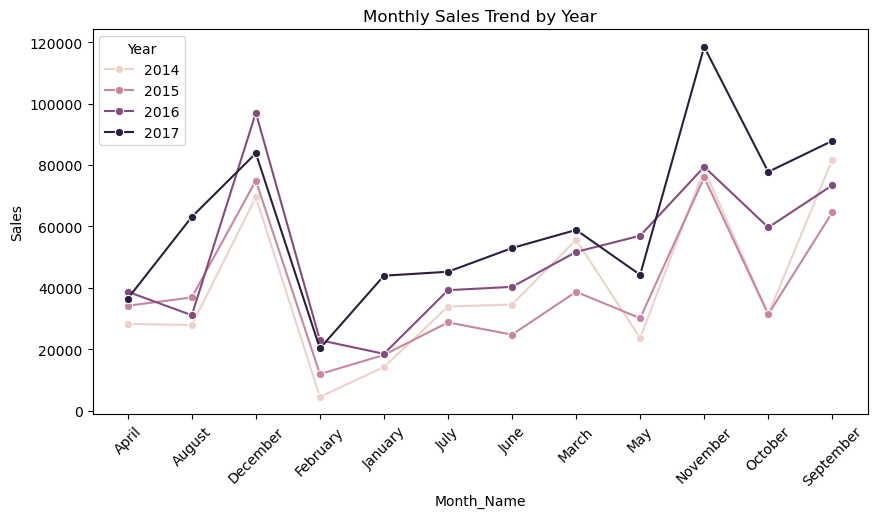

In [54]:
# Monthly sales analysis
monthly_sales = df.groupby(['Year', 'Month_Name'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month_Name', y='Sales', hue='Year', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend by Year")
plt.show()


Loss-making Orders: 1871


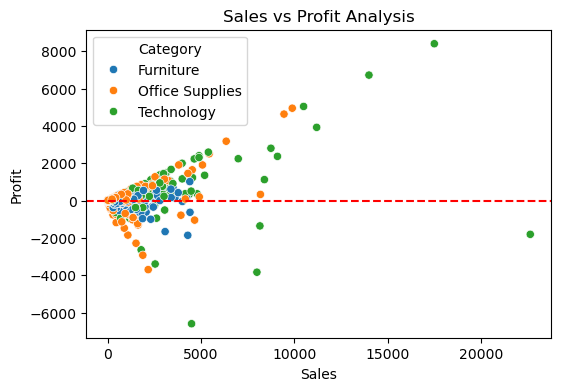

In [55]:
# PROFITABILITY ANALYSIS
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

loss_orders = df[df['Profit'] < 0]
print("\nLoss-making Orders:", loss_orders.shape[0])

plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title("Sales vs Profit Analysis")
plt.show()


<Figure size 640x480 with 0 Axes>

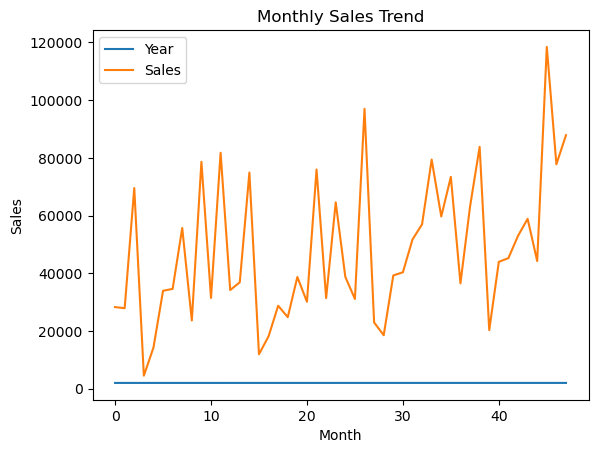

In [56]:
# Plot monthly sales trend
plt.figure()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

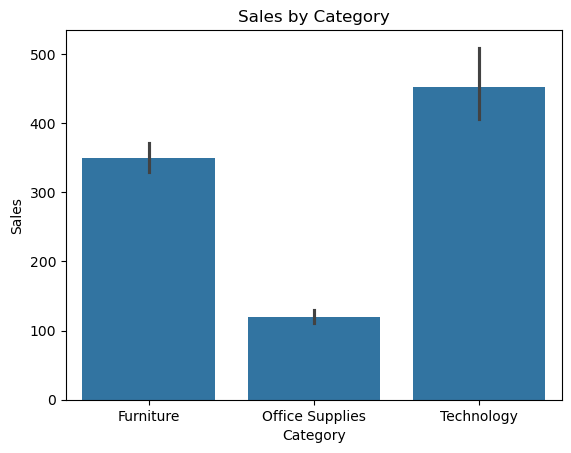

In [57]:
# Category-wise sales
plt.figure()
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()

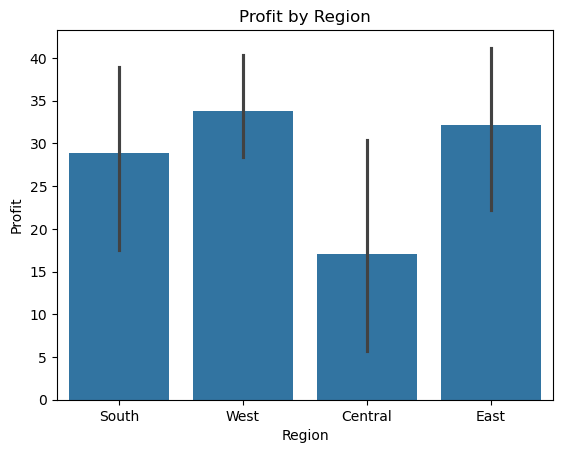

In [58]:
# Region-wise profit
plt.figure()
sns.barplot(x='Region', y='Profit', data=df)
plt.title('Profit by Region')
plt.show()

In [59]:
#  ADVANCED KPIs
avg_order_value = df['Sales'].mean()
profit_ratio = df['Profit'].sum() / df['Sales'].sum()

print(f"\nAverage Order Value (AOV): {avg_order_value:.2f}")
print(f"Overall Profit Ratio: {profit_ratio:.2%}")


Average Order Value (AOV): 229.86
Overall Profit Ratio: 12.47%
